# Task 2.3
## Perceptrón

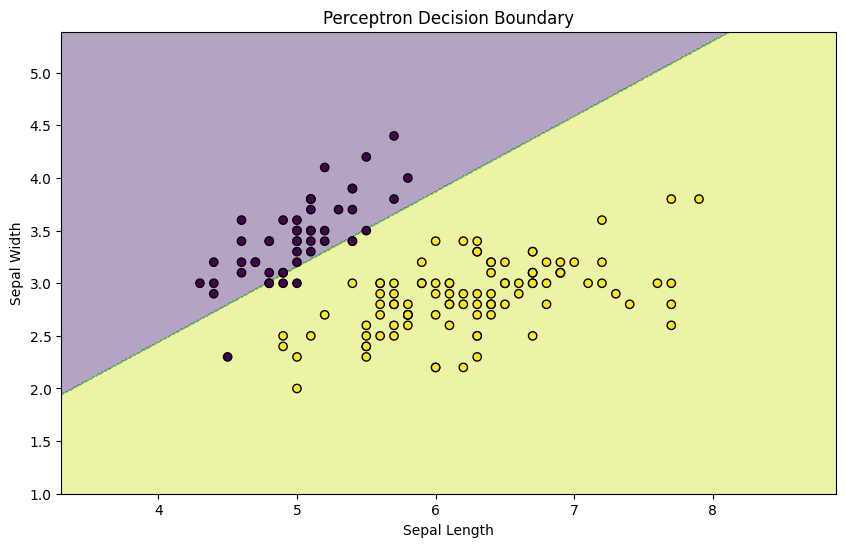

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=100):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        for _ in range(self.n_iterations):
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

def plot_decision_boundary(X, y, perceptron):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k')

# Cargar el dataset de Iris
iris = load_iris()
# Solo se toma sepal Length y Sepal Width
X = iris.data[:, :2] 
# Quitar l
y = (iris.target != 0) * 1  # Convertir las etiquetas en 0 o 1

# Instanciar y entrenar el perceptrón
perceptron = Perceptron()
perceptron.fit(X, y)

# Visualizar la frontera de decisión
plt.figure(figsize=(10, 6))
plot_decision_boundary(X, y, perceptron)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Perceptron Decision Boundary')
plt.show()


In [8]:
from sklearn.metrics import accuracy_score

# Hacer predicciones
predictions = perceptron.predict(X)

# Calcular la precisión
accuracy = accuracy_score(y, predictions)
print("Accuracy:", accuracy)


Accuracy: 0.9466666666666667
